The dataset named website containing simulated data for a sample of visitors to a website, including the amount of time in seconds they spent on the website (time_seconds), their age (age), and information about whether they accessed the website using Chrome or Safari (browser).

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Read in the data
website = pd.read_csv('/content/website.csv')

# Print the first five rows
website.head()

,time_seconds,age,browser
0,486.0,47.1,Safari
1,645.7,64.6,Chrome
2,345.0,45.4,Safari
3,413.4,34.4,Chrome
4,426.4,31.3,Safari


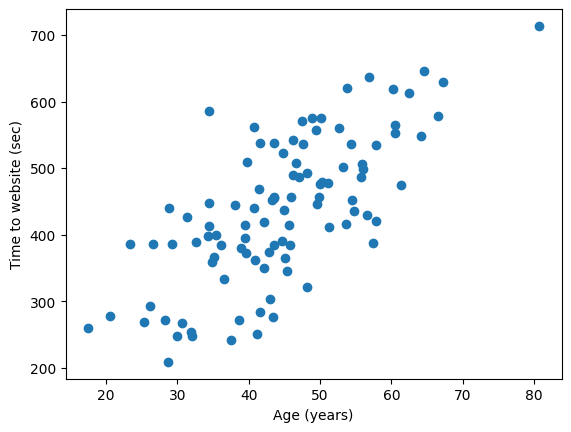

Intercept    128.967945
age            6.913758
dtype: float64


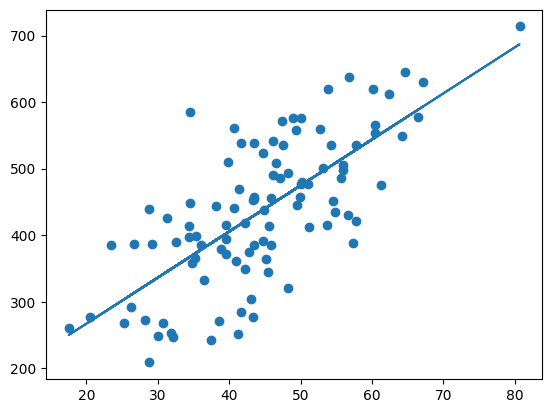

0    454.605928
1    575.596686
2    442.852540
3    366.801206
4    345.368558
dtype: float64
0    31.394072
1    70.103314
2   -97.852540
3    46.598794
4    81.031442
dtype: float64


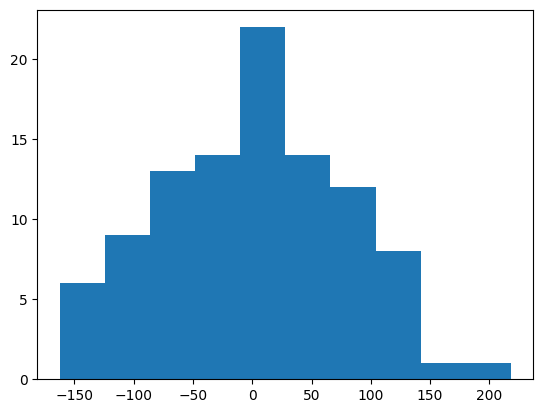

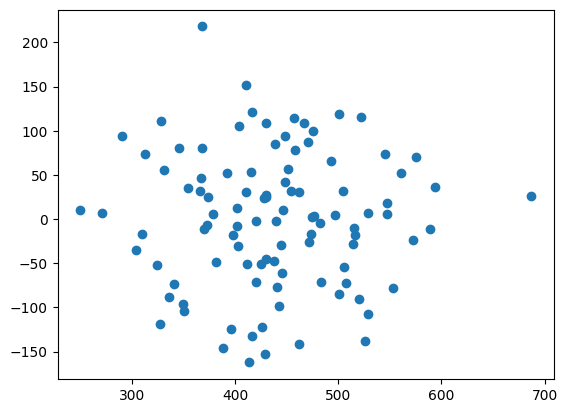

The amount of time that a 40 year old person will spend on the website is 405.5182489324498 minutes.
Intercept            489.704255
browser[T.Safari]    -99.057086
dtype: float64
Mean time at Chrome: 489.70425531914884
Mean time at Safari: 390.64716981132074
Difference in average time spent on each browser 99.0570855078281


<Figure size 640x480 with 0 Axes>

In [3]:

#Create a scatter plot of time vs age
plt.scatter(website.age, website.time_seconds)
plt.xlabel('Age (years)')
plt.ylabel('Time to website (sec)')
# Show then clear plot
plt.show()
plt.clf()


# Fit a linear regression to predict time_seconds based on age
model = sm.OLS.from_formula('time_seconds ~ age', data = website)
results = model.fit()

# Plot the scatter plot with the line on top
print(results.params)
plt.scatter(website.age, website.time_seconds)
plt.plot(website.age, results.params[0] + results.params[1]*website.age)

# Show then clear plot
plt.show()
plt.clf()


# Calculate fitted values
fitted_values = results.predict(website)
print(fitted_values.head())
# Calculate residuals
residuals = website.time_seconds - fitted_values
print(residuals.head())


# Check normality assumption
plt.hist(residuals)

# Show then clear the plot
plt.show()
plt.clf()
# it seems that they are approximately normally distributed


# Check homoscedasticity assumption
plt.scatter(fitted_values, residuals)

# Show then clear the plot
plt.show()
plt.clf()
# homoscedasticity is satisfied because we notice a pattern around from y = 0


# Predict amount of time on website for 40 year old
pred = results.params[0] + results.params[1]*40
print(f'The amount of time that a 40 year old person will spend on the website is {pred} minutes.')

# Fit a linear regression to predict time_seconds based on the browser
model1 = sm.OLS.from_formula('time_seconds ~ browser', website)
results1 = model1.fit()
print(results1.params)

# Calculate and print the group means (for comparison)
mean_time_chrome = np.mean(website.time_seconds[website.browser == 'Chrome'])
print(f'Mean time at Chrome: {mean_time_chrome}')
mean_time_safari = np.mean(website.time_seconds[website.browser == 'Safari'])
print(f'Mean time at Safari: {mean_time_safari}')
print('Difference in average time spent on each browser', np.abs(mean_time_chrome - mean_time_safari))
